Import dataset and setting up. We choose some of the features and get over other that are not appropriate such as full date. We did not make too many classes because the tree was too big or the accuracy was too small.

In [11]:
import pandas as pd
df = pd.read_csv("data.csv")

We select only one feature and set the target variable.

In [12]:
X = df[['temp']]
y = df['cnt']

Scikit-learn does not offer a way to get the loss for each epoch, but it is printed in stdout. So replace stdout with a new stream, that holds the output in a string, which we will process later to get the loss for each epoch...


In [13]:
import sys
from io import StringIO

old_stdout = sys.stdout

sys.stdout = mystdout = StringIO()

-- Epoch 1
Norm: 678.01, NNZs: 1, Bias: 1970.000000, T: 1, Avg. loss: 485112.500000
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 160.62, NNZs: 1, Bias: -466.696640, T: 1, Avg. loss: 742186.314498
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 876.68, NNZs: 1, Bias: 2547.257937, T: 1, Avg. loss: 1135490.273758
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 406.36, NNZs: 1, Bias: -1180.708048, T: 1, Avg. loss: 1737216.298134
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 1180.64, NNZs: 1, Bias: 3430.419967, T: 1, Avg. loss: 2657812.696639
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 782.32, NNZs: 1, Bias: -2273.092796, T: 1, Avg. loss: 4066257.228880
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 1645.67, NNZs: 1, Bias: 4781.592679, T: 1, Avg. loss: 6221073.393293
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 1357.52, NNZs: 1, Bias: -3944.360820, T: 1, Avg. loss: 9517783.058550
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 2357.13, NNZs: 1, B

We use only one example of our dataset

In [14]:
n = 1 ;# number of instances to keep
fX = X[:n].values
fy = y[:n].values

We use are setting the regression model


In [15]:
from sklearn.linear_model import SGDRegressor
learning_rate = 2
sgd = SGDRegressor(loss="squared_loss", learning_rate='constant', eta0=learning_rate, penalty=None, max_iter=1,
                   average=False, random_state=2018, verbose=1)

As we need to calculate also $y-\hat{y}$, we have put max_iter=1 to do only one step, and we will simulate the epochs with our loop, using partial_fit(), which does not re-initialise coefficients $\overrightarrow{w}$, and proceeds with the current ones (stored in the model).

In [16]:
import numpy as np

p_sum = [] ;# this holds the sum of y-y_hat, for all instances (ok, we habe only one instance)
epochs = 15 ;# number of epochs

for epoch in range(epochs):
    model = sgd.partial_fit(fX, fy)
    y = model.predict(fX)
    p_sum.append(np.sum(fy-y))

Restore the original stdout, and collect the loss from the prints in array loss_list:

In [17]:
sys.stdout = old_stdout
loss_history = mystdout.getvalue()
print(loss_history)
loss_list = []
for line in loss_history.split('\n'):
    if(len(line.split("loss: ")) == 1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))

Print the model coefficients:

In [18]:
print(model.coef_)

[7658.68477701]


Print the loss function over epochs:

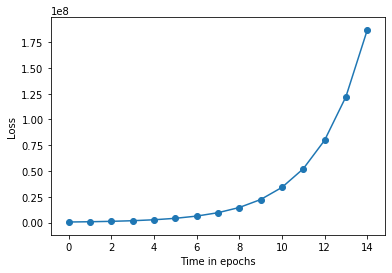

In [19]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(np.arange(len(loss_list)), loss_list)
plt.scatter(np.arange(len(loss_list)), loss_list)
plt.xlabel("Time in epochs")
plt.ylabel("Loss")
plt.show()

Print loss with respect to $y-\hat{y}$

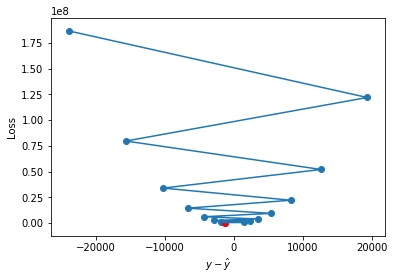

In [20]:
plt.figure()
plt.plot(p_sum, loss_list)
plt.scatter(p_sum, loss_list)
plt.scatter(p_sum[:1], loss_list[:1], color='red')
plt.xlabel("$y-\hat{y}$")
plt.ylabel("Loss")
plt.show()